In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
#from google.colab import drive
import tensorflow as tf
import keras
#drive.mount('/content/drive')

dataset = loadmat('data/face_emotion_data.mat')

X, Y = dataset['X'], dataset['y']
n, p = np.shape(X)

Y[Y == -1] = 0 #Set -1 labels to 0 (for logistic/sigmoid activation)

#X = np.hstack((np.ones((n,1)), X))
#Do not append a column of ones since we already have biases in the net

In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=9, input_shape=(9,)),
  tf.keras.layers.Dense(32, activation='sigmoid'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.05)
model.compile(optimizer=sgd,
              loss="mean_squared_error",
              metrics=['accuracy'])


In [33]:
history = model.fit(X, Y, epochs=1000, verbose=0)

In [34]:
# Does your classifier achieve 0% training error? Yes.
# If so, how many epoch does it take for your classifier to achieve perfect classification on the training set? 200-700 epochs
model.evaluate(X,  Y, verbose=2)
y_pred = model.predict(X)

4/4 - 0s - loss: 0.0054 - accuracy: 1.0000 - 67ms/epoch - 17ms/step
4/4 [==============================] - 0s 757us/step


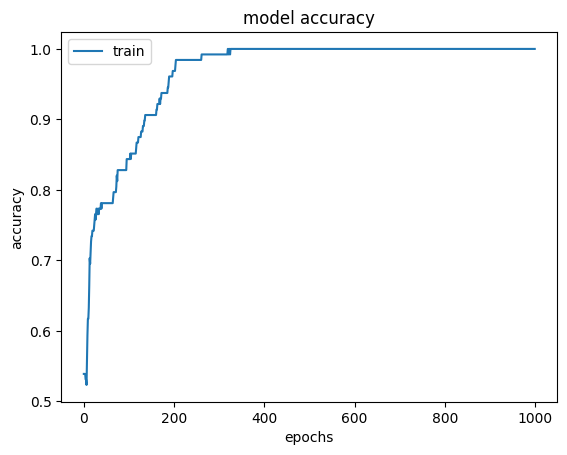

In [35]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [36]:
folds = 8
accuracy = 0
for i in range(folds):
    bin_size = int(n/folds)
    X_test = X[bin_size*i:bin_size*(i+1)]
    X_train = np.vstack((X[0:bin_size*i], X[bin_size*(i+1):]))

    y_vertical = Y.flatten()
    y_test = y_vertical[bin_size*i:bin_size*(i+1)].reshape((-1,1))

    y_train = np.hstack((y_vertical[0:bin_size*i], y_vertical[bin_size*(i+1):])).reshape((-1,1))
    model2 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=9, input_shape=(9,)),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    sgd = tf.keras.optimizers.SGD(learning_rate=0.05)
    model2.compile(optimizer=sgd,
                  loss="mean_squared_error",
                  metrics=['accuracy'])
    history = model2.fit(X_train, y_train, epochs=200, verbose=0)
    y_pred = model2.predict(X_test)
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    accuracy += np.sum(y_pred == y_test) / y_pred.shape[0]
    tf.keras.backend.clear_session()


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 16ms/step
[[0.8885694 ]
 [0.12183485]
 [0.5747872 ]
 [0.04433724]
 [0.6260945 ]
 [0.95593315]
 [0.22050337]
 [0.13660543]
 [0.96239555]
 [0.8974238 ]
 [0.9336953 ]
 [0.41564563]
 [0.8729707 ]
 [0.6425971 ]
 [0.9147969 ]
 [0.97255915]]
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]


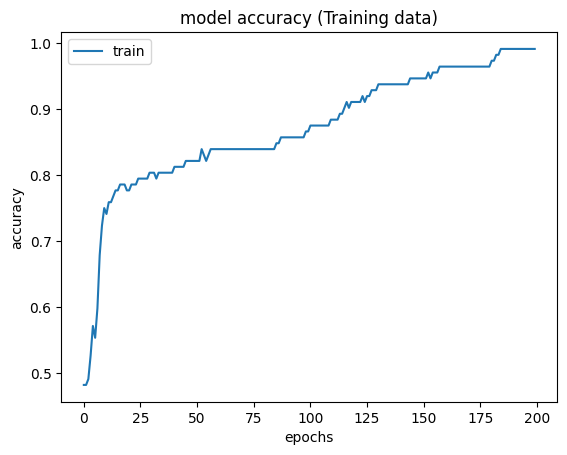

In [37]:
y_pred = model2.predict(X_test)
print(y_pred)
print(y_test)

plt.plot(history.history['accuracy'])
plt.title('model accuracy (Training data)')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [39]:
#Can you achieve perfect test accuracy? No, 95% avg accuracy
print("Average accuracy (testing data)")
print(accuracy/folds)

Average accuracy (testing data)
0.9453125
